In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from rpi_weather_display.providers import owmWeather
from rpi_weather_display import create_current_text, create_daily_text, create_hourly_plot, create_forecast_image, convert_plt_fig_to_pil, create_error_image

# Auto reload
%load_ext autoreload
%autoreload 2

# Set DPI
plt.rcParams['figure.dpi'] = 72

In [2]:
forecast = owmWeather(lat=52.494117, long=13.422371, api_key=os.environ["OWM_API_KEY"])

## Current weather plot

In [3]:
c_text = create_current_text(forecast.get_current_weather())

In [4]:
print(c_text)

Temperature: 11.6
Temperature_feels_like: 7.0
Description: few clouds
Rain: 0
Updated_at: 28-10-2020 11:29:44


## Hourly plot

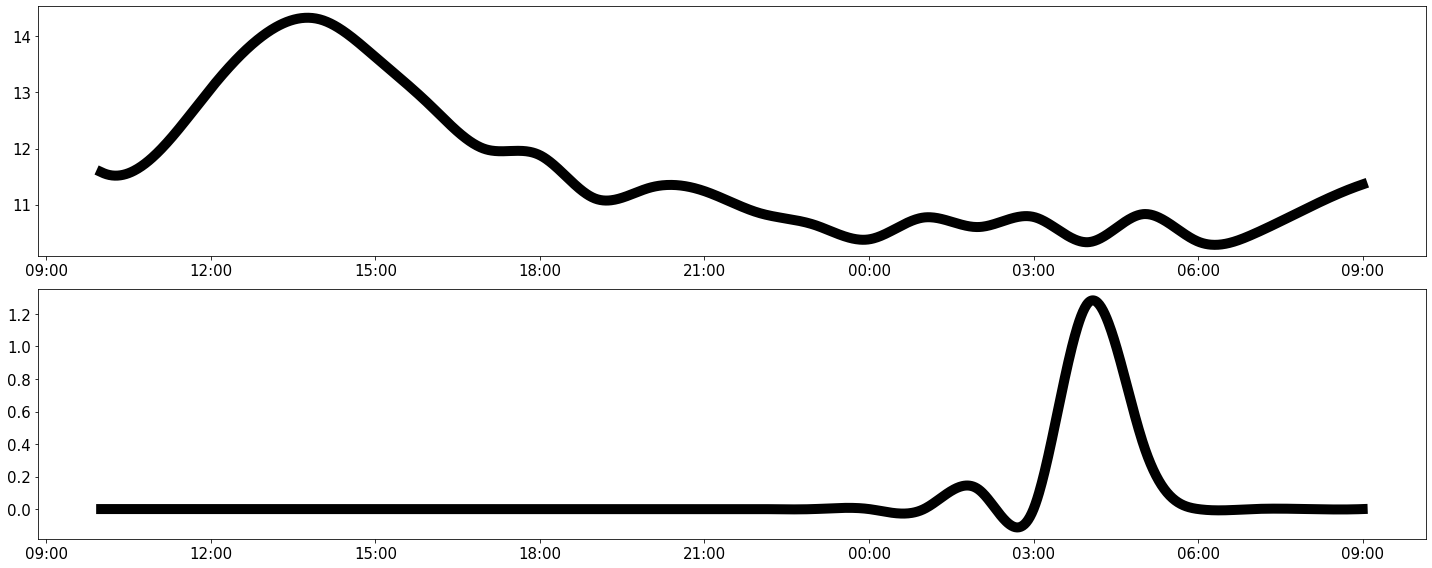

In [5]:
h_plot = create_hourly_plot(forecast.get_hourly_data())

In [6]:
convert_plt_fig_to_pil(h_plot).size

(1440, 576)

## Daily weather plot

In [7]:
d_text = create_daily_text(forecast.get_daily_data())

In [8]:
print(d_text[0])

Today
Low: 9.72
High: 13.19
Rain: 0.68


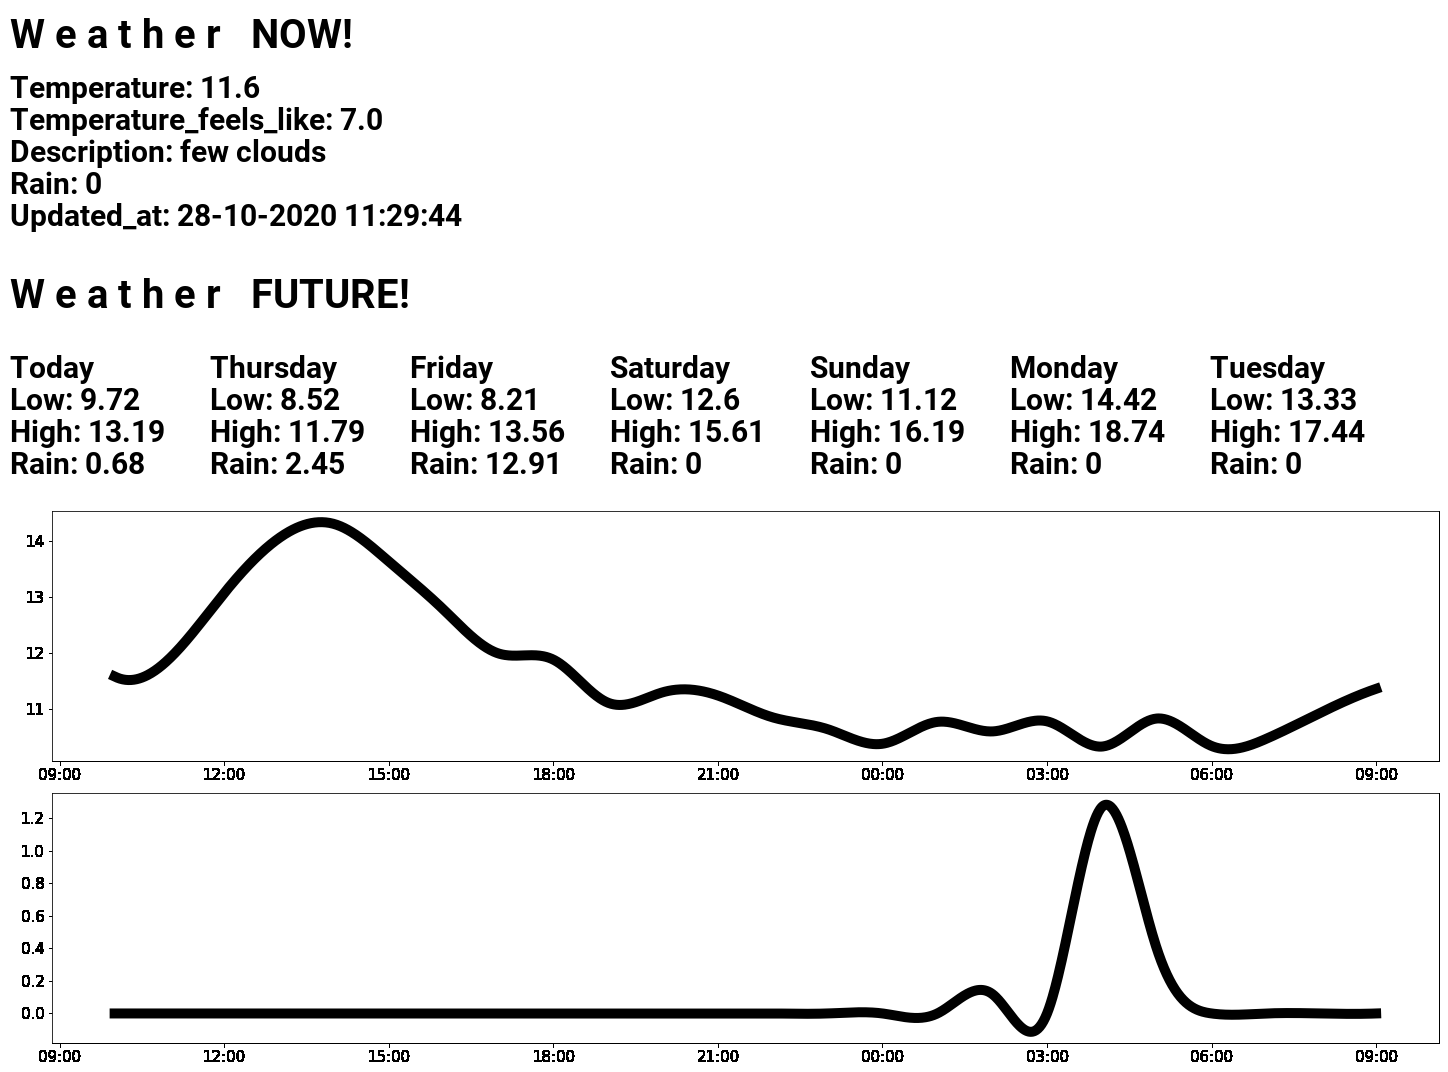

In [9]:
create_forecast_image(
    hourly_plot=convert_plt_fig_to_pil(h_plot),
    daily_text=d_text,
    current_text=c_text,
    font_path='rpi_weather_display/fonts/Roboto-Bold.ttf'
)